In [278]:
import pandas as pd
import numpy as np
import openpyxl


In [279]:
siyaset = pd.read_csv("TurkishNewsArticles.csv")

In [280]:
kur = pd.read_excel('kur_verisi.xlsx')

In [281]:
siyaset["text"] = siyaset["text"].apply(lambda x: str(x).replace('\n', ' ') if isinstance(x, str) else x)

In [282]:
def parse_turkish_date(d):
    months = {
        "Ocak": "01", "Şubat": "02", "Mart": "03", "Nisan": "04", "Mayıs": "05", "Haziran": "06",
        "Temmuz": "07", "Ağustos": "08", "Eylül": "09", "Ekim": "10", "Kasım": "11", "Aralık": "12"
    }
    for tr, num in months.items():
        d = d.replace(tr, num)
    return pd.to_datetime(d.split(",")[0], format="%d %m %Y", errors='coerce')

siyaset['parsed_date'] = siyaset['date'].apply(parse_turkish_date)


In [283]:
unique_dates = siyaset['parsed_date'].sort_values().unique()

In [284]:

# Varsayalım siyaset dataframe'in zaten var ve 'parsed_date' datetime formatında.

# 1. Tarihleri artan sıraya göre sırala
siyaset = siyaset.sort_values(by='parsed_date', ascending=True).reset_index(drop=True)

# 2. Filtre aralığını belirle
start_date = pd.Timestamp('2010-12-11')
end_date = pd.Timestamp('2021-03-20')

# 3. Filtreyi uygula ve tekrar eden tarihleri çıkar
filtered_dates = siyaset[
    (siyaset['parsed_date'] >= start_date) & 
    (siyaset['parsed_date'] <= end_date)
]['parsed_date'].drop_duplicates().reset_index(drop=True)

# 4. Tarihler arasındaki farkı gün olarak hesapla
date_diffs = filtered_dates.diff().dt.days.fillna(1)  # İlk satır NaN olur, 1 ile doldur

# 5. Ardışık olmayan yerlerde yeni blok başlat (fark 1'den farklı ise)
blocks = []
current_block = [filtered_dates.iloc[0]]

for i in range(1, len(filtered_dates)):
    if date_diffs.iloc[i] == 1:
        current_block.append(filtered_dates.iloc[i])
    else:
        blocks.append(current_block)
        current_block = [filtered_dates.iloc[i]]

# Son bloğu da ekle
blocks.append(current_block)



In [285]:
def get_consecutive_blocks_day_counts(dates, start_date, end_date):
    # Tarihleri filtrele ve unique yap
    filtered_dates = dates[
        (dates >= start_date) & (dates <= end_date)
    ].drop_duplicates().sort_values().reset_index(drop=True)
    
    # Gün farklarını hesapla
    date_diffs = filtered_dates.diff().dt.days.fillna(1)
    
    blocks = []
    current_block = [filtered_dates.iloc[0]]

    for i in range(1, len(filtered_dates)):
        if date_diffs.iloc[i] == 1:
            current_block.append(filtered_dates.iloc[i])
        else:
            blocks.append(current_block)
            current_block = [filtered_dates.iloc[i]]
    blocks.append(current_block)
    
    # Her blok için gün sayısı döndür
    day_counts = [len(block) for block in blocks]
    return day_counts
start_date = pd.Timestamp('2010-12-11')
end_date = pd.Timestamp('2021-12-19')
day_counts = get_consecutive_blocks_day_counts(siyaset['parsed_date'], start_date, end_date)
print(day_counts)  # her bloktaki ardışık gün sayısı listesi
print("Ortalama gün sayısı:", sum(day_counts) / len(day_counts))


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [286]:
kur = kur.drop(columns=['Unnamed: 2'])

In [287]:
kur= kur.iloc[:-8]

In [288]:
kur['Tarih'] = kur['Tarih'].str.strip()
kur['Tarih'] = pd.to_datetime(kur['Tarih'], dayfirst=True)

In [289]:
siyaset.rename(columns={'parsed_date': 'Tarih'}, inplace=True)

In [290]:
haber_kur = pd.merge(siyaset, kur, on='Tarih', how='inner')

In [291]:
print(siyaset.columns.tolist())
print(kur.columns.tolist())

['date', 'author', 'title', 'link', 'text', 'Tarih']
['Tarih', 'USD/TRY']


In [292]:
# Haberleri tarih bazında grupla ve her günün haber sayısını al
haber_sayilari = siyaset.groupby('Tarih').size().reset_index(name='haber_sayisi')


In [293]:
kur_haber_sayisi = pd.merge(kur, haber_sayilari, on='Tarih', how='left')

# Haber olmayan günlerde NaN olur, onları 0 yapalım
kur_haber_sayisi['haber_sayisi'] = kur_haber_sayisi['haber_sayisi'].fillna(0).astype(int)


In [294]:
# Haftasonu günleri
haftasonu = haber_sayilari[haber_sayilari['Tarih'].dt.dayofweek >= 5].copy()

# Pazartesi günlerine ekleme için sözlük (dict) oluştur
pazartesi_ekle = {}

for tarih, sayi in zip(haftasonu['Tarih'], haftasonu['haber_sayisi']):
    pazartesi = tarih + pd.Timedelta(days=(7 - tarih.dayofweek))
    pazartesi_ekle[pazartesi] = pazartesi_ekle.get(pazartesi, 0) + sayi

# Haber sayısına Pazartesi eklemelerini uygula (NaN'ları 0 kabul ederek)
for pazartesi_tarih, ekle_sayi in pazartesi_ekle.items():
    if pazartesi_tarih in haber_sayilari['Tarih'].values:
        haber_sayilari.loc[haber_sayilari['Tarih'] == pazartesi_tarih, 'haber_sayisi'] += ekle_sayi
    else:
        # Pazartesi günü yoksa yeni satır eklemek istersen burada yapabilirsin (şimdilik pas geçebiliriz)
        pass

# Haftasonu günlerini çıkar
haber_sayilari = haber_sayilari[haber_sayilari['Tarih'].dt.dayofweek < 5].reset_index(drop=True)


In [295]:

haber_sayilari = pd.merge(haber_sayilari, kur[['Tarih', 'USD/TRY']], on='Tarih', how='left')


In [296]:
haber_sayilari['USD/TRY'] = haber_sayilari['USD/TRY'].ffill().bfill()

C:\Users\baris\AppData\Local\Temp\ipykernel_243536\4167814726.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  haber_sayilari['USD/TRY'] = haber_sayilari['USD/TRY'].ffill().bfill()


In [297]:
print(haber_sayilari['USD/TRY'].isna().sum())  # NaN kalmış mı?


0


In [298]:
haber_sayilari

,Tarih,haber_sayisi,USD/TRY
0,2012-05-11,1,1.7788
1,2012-05-15,1,1.7985
2,2012-05-18,1,1.8160
3,2012-05-21,2,1.8236
4,2012-05-23,1,1.8170
...,...,...,...
346,2021-03-15,70,7.5709
347,2021-03-16,15,7.5374
348,2021-03-17,22,7.5041
349,2021-03-18,19,7.4980


In [299]:
window_size = 1

X = []
y = []

haber_sayilari['Tarih_fark'] = haber_sayilari['Tarih'].diff().dt.days

for i in range(len(haber_sayilari) - window_size):
    # i ile i+window_size arasında (örneğin 0-2) tarih farkları [1,1] olmalı
    days_diff = haber_sayilari['Tarih_fark'].iloc[i+1 : i+window_size]
    
    if all(days_diff == 1):
        x_window = haber_sayilari['haber_sayisi'].iloc[i : i+window_size].values  # 3 gün
        y_value = haber_sayilari['USD/TRY'].iloc[i+window_size]  # 4. gün

        X.append(x_window)
        y.append(y_value)

X = np.array(X)
y = np.array(y)


In [300]:
X.shape

(350, 1)

In [301]:
gunluk_metnler = siyaset.groupby('Tarih')['text'].apply(lambda texts: ' '.join(texts)).reset_index()


In [302]:
haber_sayilari.rename(columns=lambda x: x.strip(), inplace=True)
gunluk_metnler.rename(columns=lambda x: x.strip(), inplace=True)


In [303]:

siyaset = siyaset.rename(columns={'parsed_date': 'Tarih'})
gunluk_metnler = gunluk_metnler.rename(columns={'parsed_date': 'Tarih'})


In [304]:
# gunluk_metnler: her günün birleşik haber metni, 'Tarih' ve 'text' sütunları var
# haber_sayilari: tarih, haber_sayisi ve kur verisi içeriyor

combined_df = pd.merge(haber_sayilari, gunluk_metnler, on='Tarih', how='left')

# Metin olmayan günler için boş string ata
combined_df['text'] = combined_df['text'].fillna('')

# combined_df şimdi şu sütunları içerir:
# 'Tarih', 'haber_sayisi', 'USD/TRY', 'text' (birleştirilmiş haber metni)


In [305]:
combined_df['Tarih_fark'] = combined_df['Tarih'].diff().dt.days.fillna(1)


In [306]:
combined_df

,Tarih,haber_sayisi,USD/TRY,Tarih_fark,text
0,2012-05-11,1,1.7788,1.0,Bu hafta İstanbul'da basketbolu paylaşacağız...
1,2012-05-15,1,1.7985,4.0,Kaybetmeyi de oyunun bir parçası olarak göre...
2,2012-05-18,1,1.8160,3.0,Serinin ilk maçının sonlarında Beşiktaş Mila...
3,2012-05-21,2,1.8236,3.0,SERİYE Beşiktaş asistan coach'u Yağızer Uluğ...
4,2012-05-23,1,1.8170,2.0,"Basketbol adına, derbi adına, finalist olmak..."
...,...,...,...,...,...
346,2021-03-15,70,7.5709,3.0,Global Yatırım Holding Yönetim Kurulu Üyesi ...
347,2021-03-16,15,7.5374,1.0,"Marketten ""limonata"" alıp içiyorsun ama için..."
348,2021-03-17,22,7.5041,1.0,"Denizli'de... ""Üç yeri"" gez... Bayramyeri......"
349,2021-03-18,19,7.4980,1.0,Pandemi döneminde bunların iki buçuk (rakaml...


In [307]:
window_size = 1 # istediğin pencere boyutu

X_text_windows = []
y = []

# Tarih farkı kontrolü için
combined_df['Tarih_fark'] = combined_df['Tarih'].diff().dt.days

for i in range(len(combined_df) - window_size):
    days_diff = combined_df['Tarih_fark'].iloc[i+1 : i+window_size]
    if all(days_diff == 1):
        # Pencere içindeki metinleri birleştir
        texts = combined_df['text'].iloc[i : i+window_size].values
        combined_text = " ".join(texts)
        
        X_text_windows.append(combined_text)
        # Hedef: pencerenin hemen sonrası günün döviz kuru
        y.append(combined_df['USD/TRY'].iloc[i+window_size])

print("Hazırlanan metin sayısı:", len(X_text_windows))

Hazırlanan metin sayısı: 350


In [308]:
len(y)

350

In [309]:
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk

from nltk.corpus import stopwords

turkish_stopwords = stopwords.words('turkish')

tfidf_vectorizer = TfidfVectorizer(
    max_features=2000,
    stop_words=turkish_stopwords,
    max_df=0.8,
    min_df=5
)

tfidf_matrix = tfidf_vectorizer.fit_transform(X_text_windows)
print("TF-IDF matrisi shape:", tfidf_matrix.shape)

TF-IDF matrisi shape: (350, 2000)


In [310]:
# 3. Model için X ve y hazırla
X = tfidf_matrix
y = np.array(y)


TF-IDF matrisi shape: (350, 2000)

Eğitiliyor: LinearRegression
LinearRegression -> Train Time: 0.0067s, Test Time: 0.0000s, MAE: 0.8266 TL, MAPE: 0.1991, R²: 0.6914


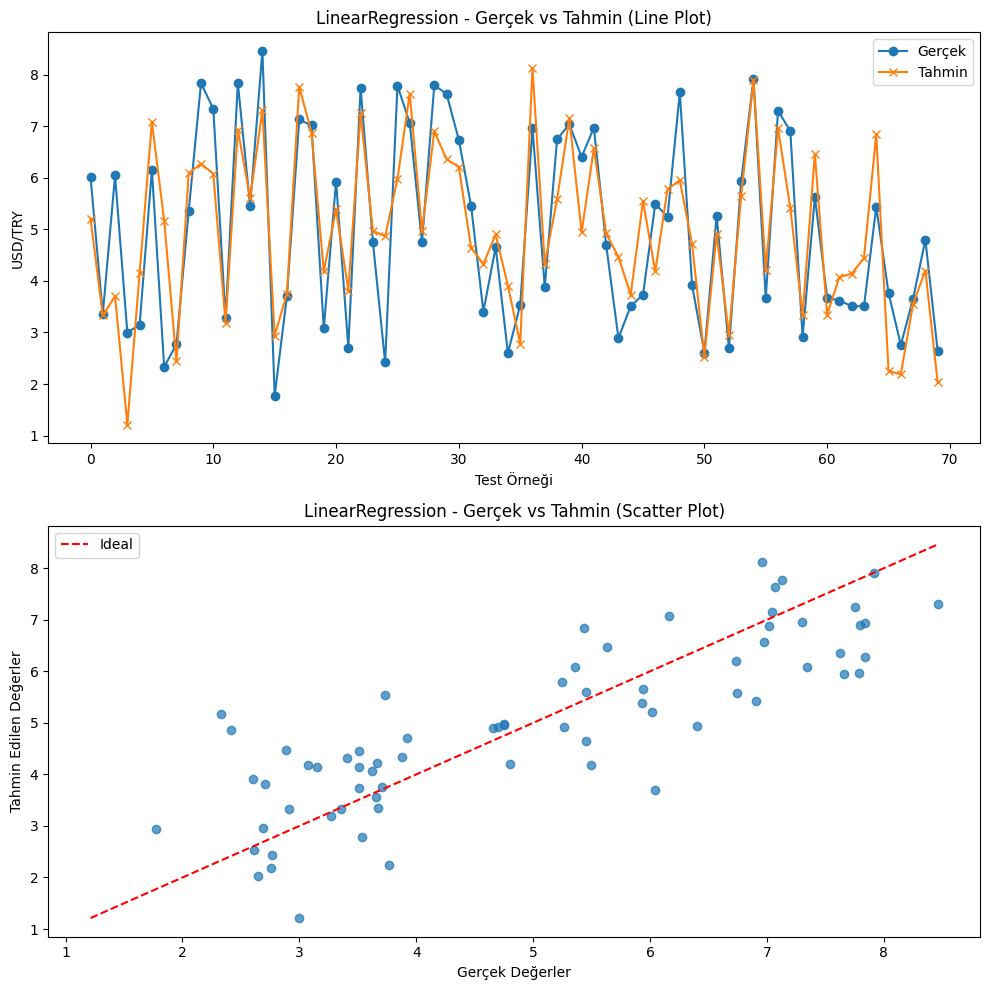


Eğitiliyor: Ridge
Ridge -> Train Time: 0.0031s, Test Time: 0.0000s, MAE: 0.9114 TL, MAPE: 0.2235, R²: 0.6230


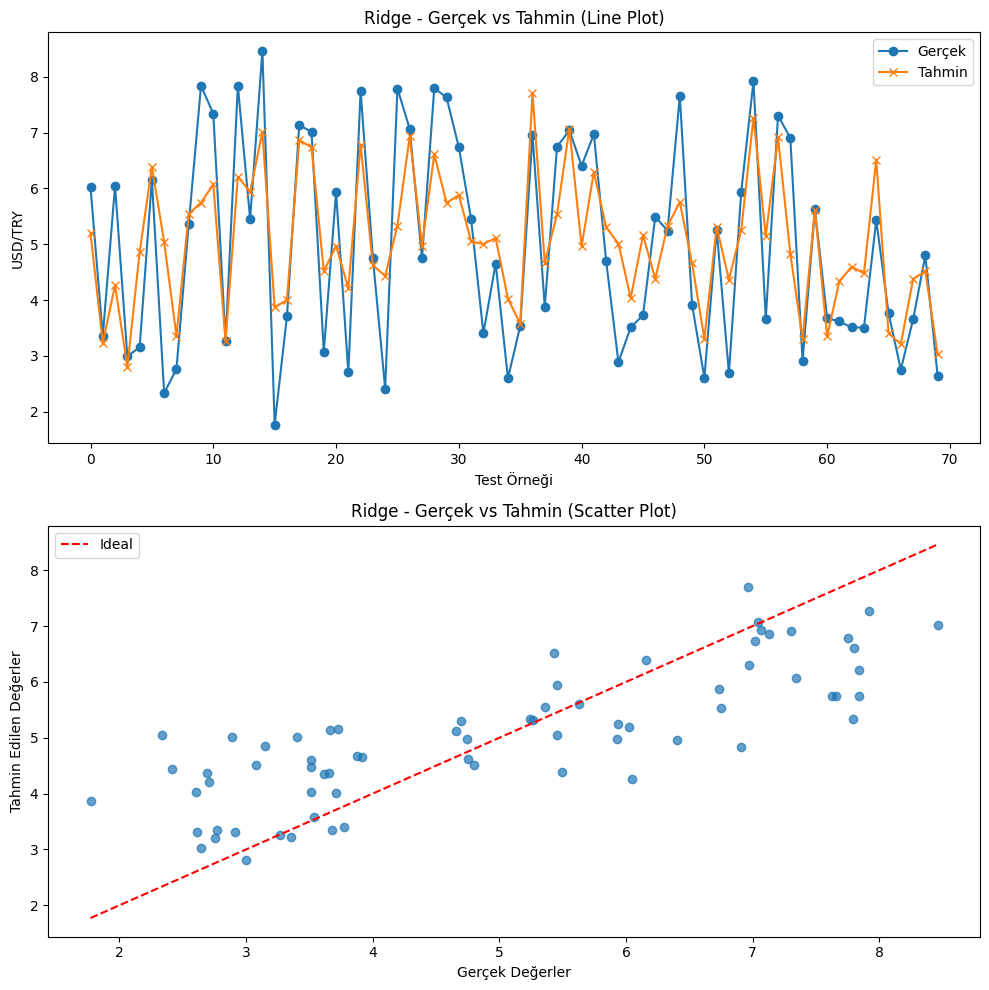


Eğitiliyor: Lasso
Lasso -> Train Time: 0.0030s, Test Time: 0.0000s, MAE: 1.6634 TL, MAPE: 0.4178, R²: -0.0129


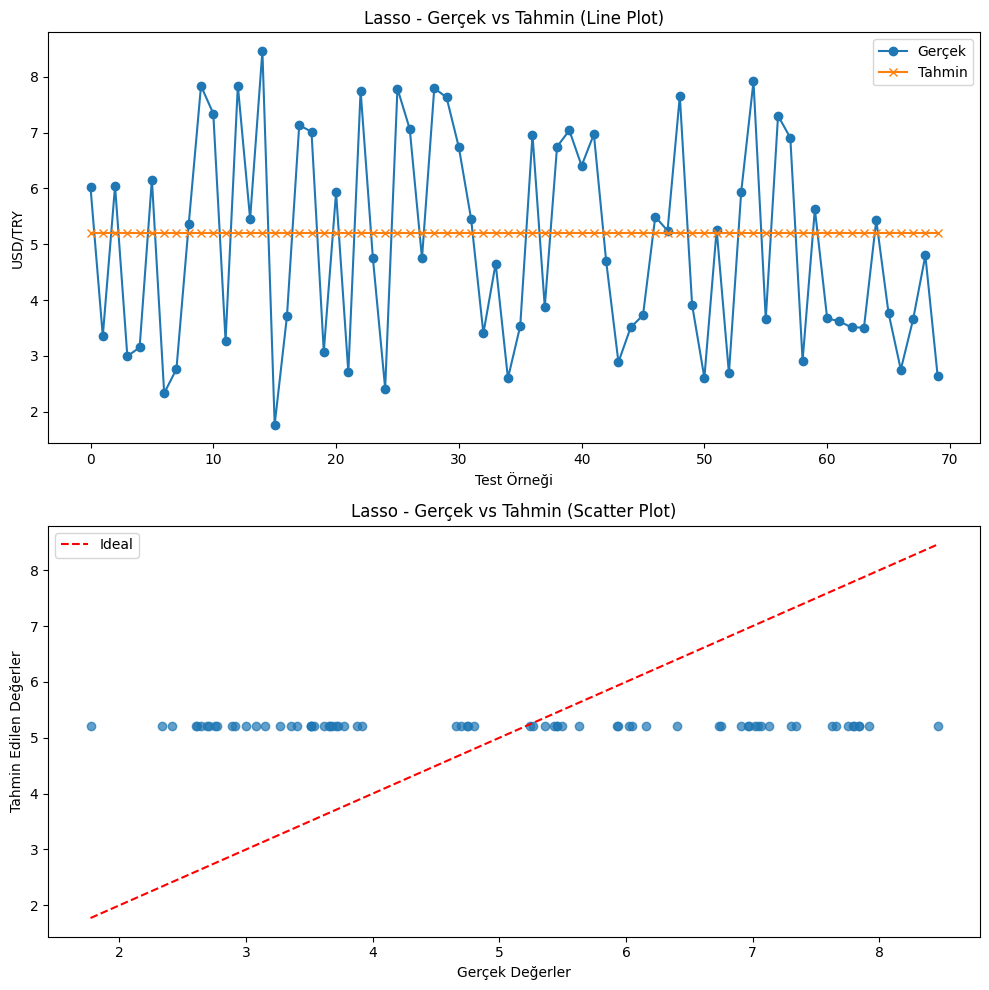


Eğitiliyor: RandomForest
RandomForest -> Train Time: 4.9443s, Test Time: 0.0066s, MAE: 1.0311 TL, MAPE: 0.2503, R²: 0.4948


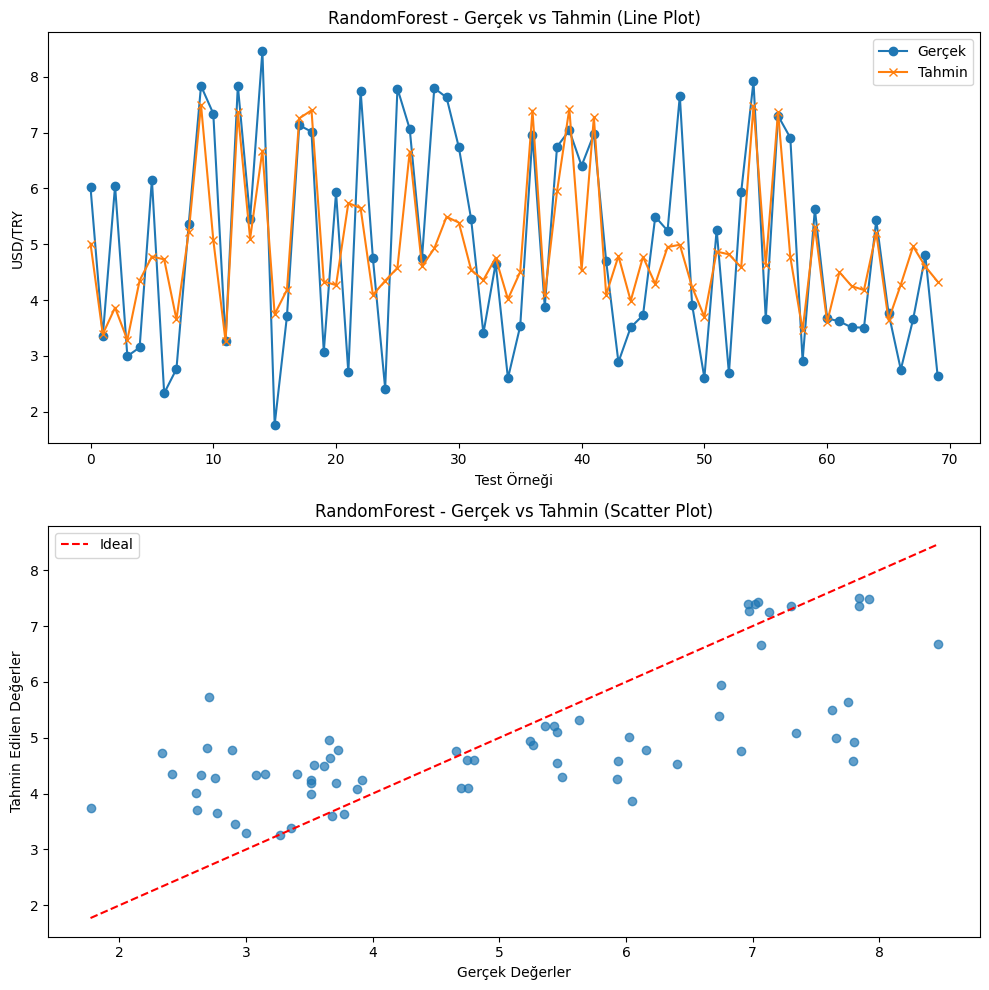


Eğitiliyor: SVR
SVR -> Train Time: 0.0677s, Test Time: 0.0160s, MAE: 1.0467 TL, MAPE: 0.2637, R²: 0.5087


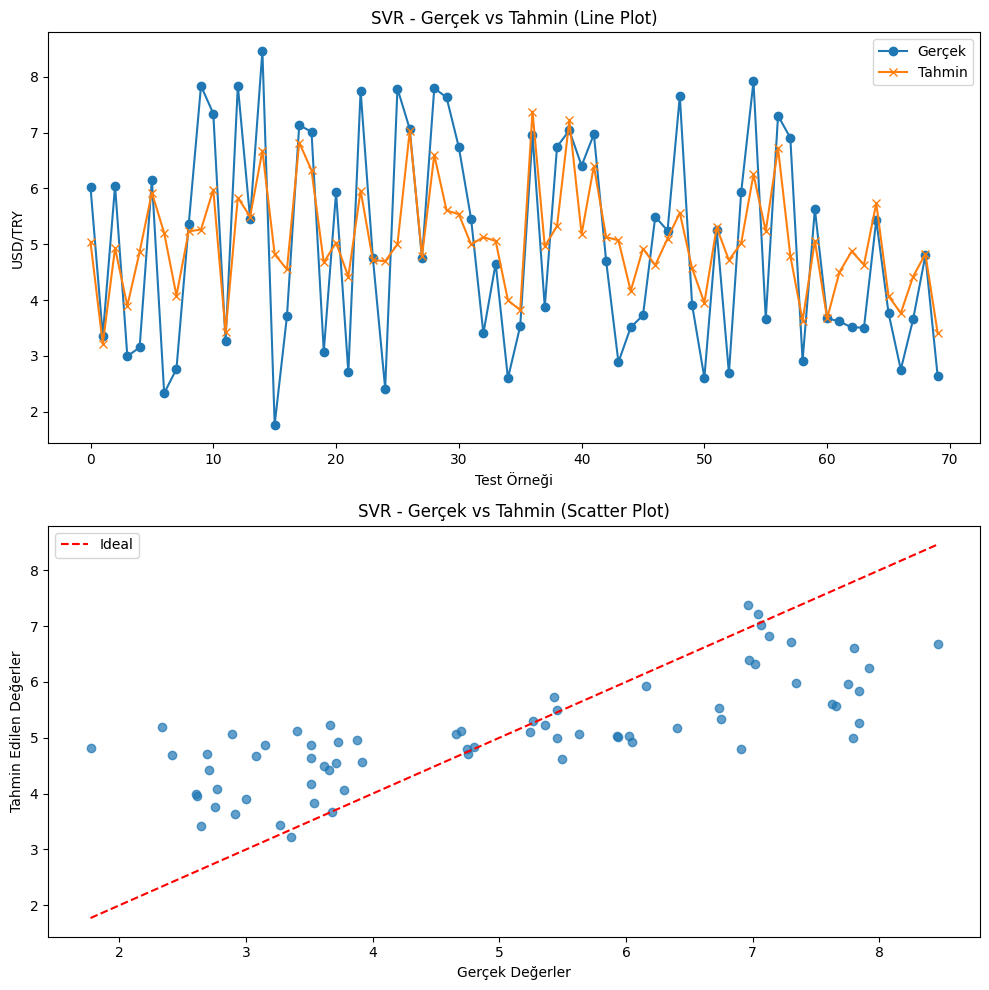


Eğitiliyor: GradientBoosting
GradientBoosting -> Train Time: 1.0948s, Test Time: 0.0010s, MAE: 1.0215 TL, MAPE: 0.2368, R²: 0.5230


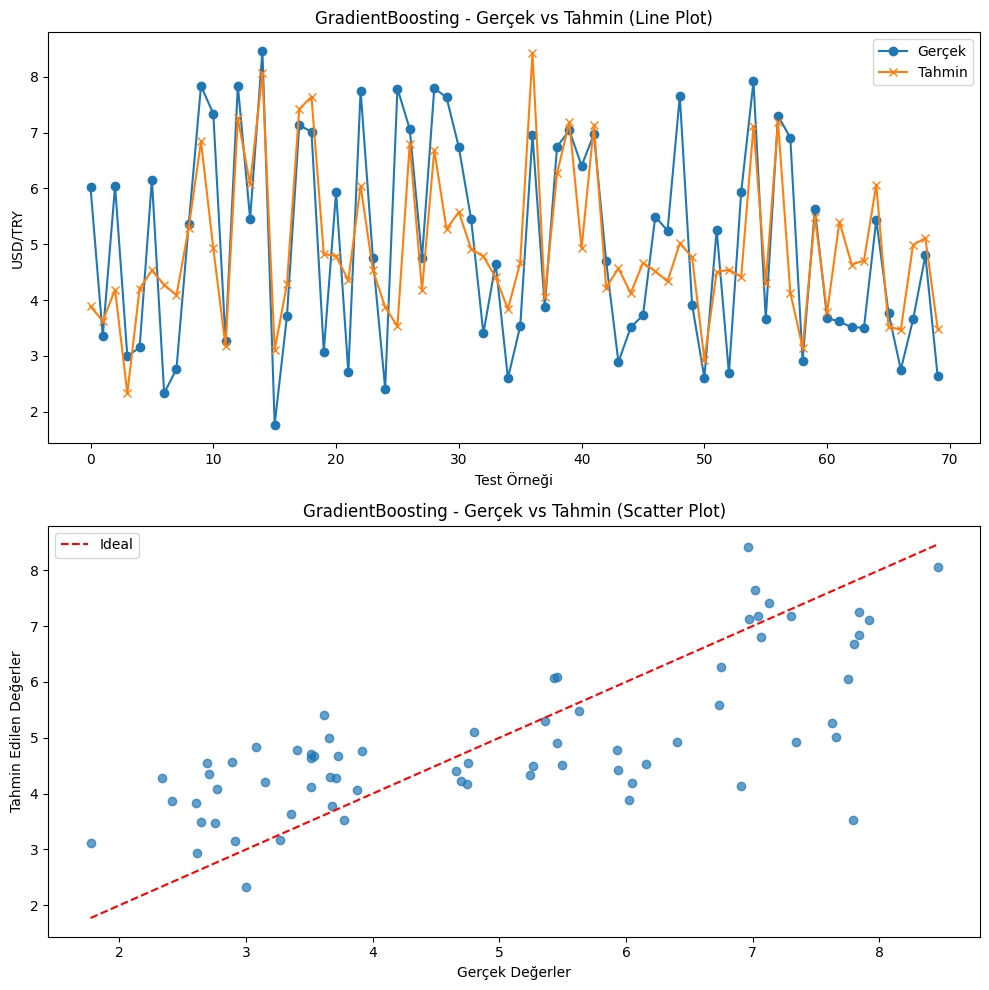


Eğitiliyor: XGBoost
XGBoost -> Train Time: 0.6630s, Test Time: 0.0000s, MAE: 1.0208 TL, MAPE: 0.2416, R²: 0.4844


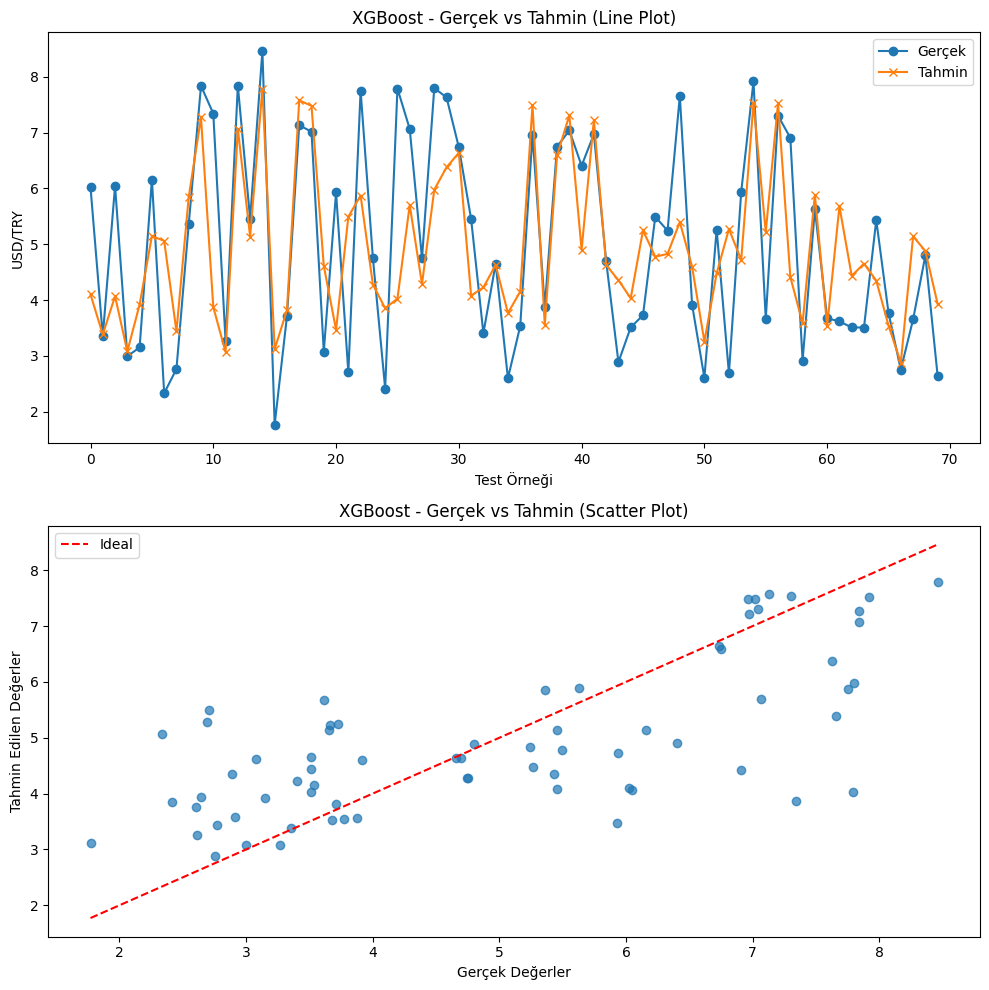

In [327]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
turkish_stopwords = stopwords.words('turkish')

tfidf_vectorizer = TfidfVectorizer(
    max_features=999,
    stop_words=turkish_stopwords,
    max_df=0.8,
    min_df=5
)

X_tfidf = tfidf_vectorizer.fit_transform(X_text_windows)
print("TF-IDF matrisi shape:", tfidf_matrix.shape)
# Rastgele train/test ayrımını yapalım (örneğin %80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=13)

# Kullanacağımız modellerin sözlüğü:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=13),
    "SVR": SVR(),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=13),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# Her model için ayrı ayrı grafik çizelim:
for name, model in models.items():
    print(f"\nEğitiliyor: {name}")
    
    # Modelin eğitim süresi ölçümü (isteğe bağlı)
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    # Test tahmin süresi ölçümü
    start_test = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_test
    
    # Metrikleri hesaplayalım (hesaplamalar isteğe bağlı, burada sadece grafik amaçlı)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Metrikleri yazdıralım
    print(f"{name} -> Train Time: {train_time:.4f}s, Test Time: {test_time:.4f}s, MAE: {mae:.4f} TL, MAPE: {mape:.4f}, R²: {r2:.4f}")
    
    # Grafik: 2 subplt, biri line plot, diğeri scatter plot
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    
    # Line Plot: Test örneklerinin sırasına göre gerçek ve tahmin edilen değerler
    ax[0].plot(list(range(len(y_test))), y_test, label='Gerçek', marker='o')
    ax[0].plot(list(range(len(y_pred))), y_pred, label='Tahmin', marker='x')
    ax[0].set_title(f'{name} - Gerçek vs Tahmin (Line Plot)')
    ax[0].set_xlabel('Test Örneği')
    ax[0].set_ylabel('USD/TRY')
    ax[0].legend()
    
    # Scatter Plot: Gerçek değerler vs Tahmin edilen değerler
    ax[1].scatter(y_test, y_pred, alpha=0.7)
    # 45° referans çizgisi (gerçek = tahmin) ekleyelim:
    min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
    ax[1].plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal')
    ax[1].set_title(f'{name} - Gerçek vs Tahmin (Scatter Plot)')
    ax[1].set_xlabel('Gerçek Değerler')
    ax[1].set_ylabel('Tahmin Edilen Değerler')
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()
    
